# **Project Name**    - Retail Sales Predication 

##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Hariom Gupta ( Team Leader )
##### **Team Member 2 -** Pallavi s
##### **Team Member 3 -** Aditya Singh
##### **Team Member 4 -** Vishwajeet Salunkhe
##### **Team Member 5 -** Ritesh Verma



# **Project Summary -**

This Roseman Stores dataset is current as of right now. Upon analysing this issue, we find that Roseman problem is a regression issue, and our main objective is to forecast Roseman problem's sales figures. These are the topics we work on in this notebook:

applying exploratory data analysis to the dataset analysis. Examine trends and seasonality in the Roseman dataset by using exponential moving averages. Utilising the subsequent prediction analysis, analyse regression analysis A. Analysis of Linear Regression B. Lasso and Ridge Regression, or Elastic Regression. Random Forest Regression (C). Xgboost and d.adaboost).

Using the above algorithm, we find that Xgboost has an accuracy of 98%.


# **Problem Statement**

**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# ***Let's Begin !***
### Import Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random
from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle


### Dataset Loading


In [64]:
Dataset = "/Users/hariomgupta/Documents/GitHub/Retail-Sales-Predication/Rossmann Stores Data.csv"
sales_df =pd.read_csv(Dataset)
Store ="/Users/hariomgupta/Documents/GitHub/Retail-Sales-Predication/store.csv"
Store_df =pd.read_csv(Store)

/var/folders/rd/865zm2ss20s5_zg1t3c8f2h40000gn/T/ipykernel_48422/2590977194.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df =pd.read_csv(Dataset)


### Dataset First View


In [65]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [66]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [67]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [68]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [69]:
sales_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [70]:
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [71]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [72]:
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **2-Data Wrangling**

#### Missing Values/Null Values

In [73]:
sales_df['SchoolHoliday'].unique()

array([1, 0])

In [74]:
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [75]:
Store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [76]:
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].fillna(0)
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].fillna(0)
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'] .fillna(0)
Store_df['Promo2SinceWeek'] = Store_df['Promo2SinceWeek'].fillna(0)
Store_df['Promo2SinceYear'] = Store_df['Promo2SinceYear'].fillna(0)
Store_df['PromoInterval'] = Store_df['PromoInterval'].fillna(0)


In [77]:
Store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [78]:
Store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [79]:
final_1 = pd.merge(sales_df,Store_df, on='Store', how='left')

In [80]:
final_1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [81]:
#Change data types object to int
final_1.loc[final_1['StateHoliday'] == '0','StateHoliday'] = 0
final_1.loc[final_1['StateHoliday'] == 'a','StateHoliday'] = 1
final_1.loc[final_1['StateHoliday'] == 'b','StateHoliday'] = 2
final_1.loc[final_1['StateHoliday'] == 'c','StateHoliday'] = 3

# store the value with same column name stateholiday with function astype

final_1['StateHoliday'] = final_1['StateHoliday'].astype(int, copy = False)


In [82]:
#Change data types object to int
final_1.loc[final_1['Assortment'] == 'a','Assortment'] = 0
final_1.loc[final_1['Assortment'] == 'b','Assortment'] = 1
final_1.loc[final_1['Assortment'] == 'c','Assortment'] = 2


# store the value with same column name Assortment with function astype

final_1['Assortment'] = final_1['Assortment'].astype(int, copy = False)


In [83]:
# change Data Types object into int 
final_1.loc[final_1['StoreType'] == 'a', 'StoreType'] = 0
final_1.loc[final_1['StoreType'] == 'b', 'StoreType'] = 1
final_1.loc[final_1['StoreType'] == 'c', 'StoreType'] = 2
final_1.loc[final_1['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final_1['StoreType'] = final_1['StoreType'].astype(int, copy=False)

In [84]:
print(final_1[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [85]:
final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [86]:
final_1['Sales'].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

In [87]:
#code from changeing formate of date from object to datetime
final_1['Date'] = pd.to_datetime(final_1['Date'], format = '%Y-%m-%d')


In [88]:
# code for change object into date format
final_1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_1['Date']).month   

In [89]:
#code for change float into intger
final_1['CompetitionOpenSinceYear']=final_1['CompetitionOpenSinceYear'].astype(int)
final_1['Promo2SinceYear'] = final_1['Promo2SinceYear'].astype(int)
# code for change float into integer 
final_1['CompetitionDistance']= final_1['CompetitionDistance'].astype(int)
final_1['Promo2SinceWeek']= final_1['Promo2SinceWeek'].astype(int)

In [90]:
final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

# **3-Understanding Your Variables**


In [91]:
final_1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [92]:
round(final_1.describe(), 2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88


# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**



Sales
### Line Chart

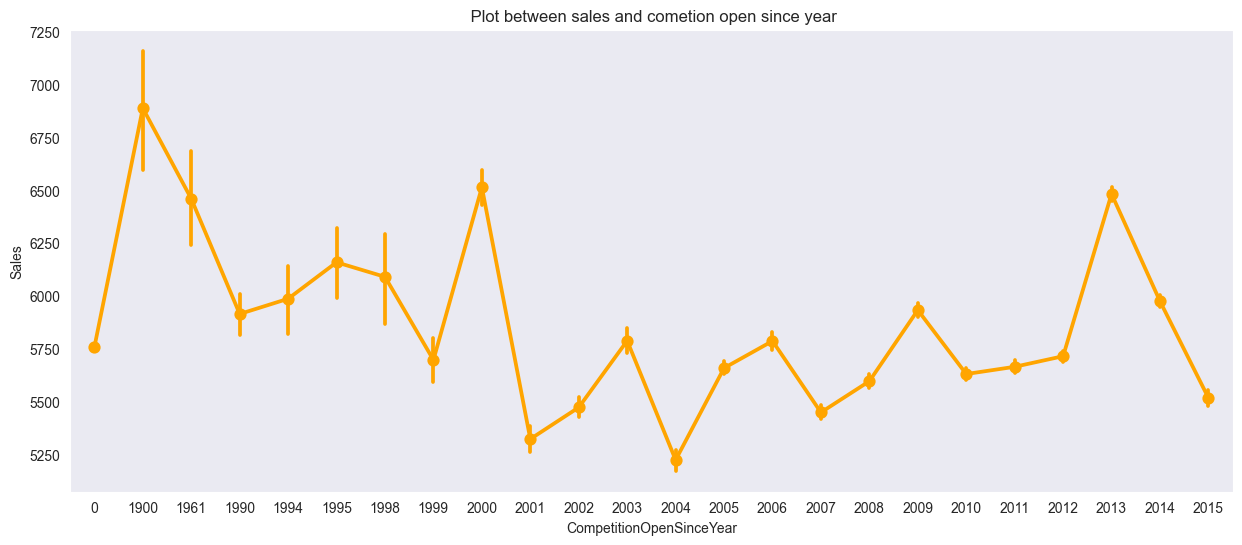

In [93]:
plt.figure(figsize=(15, 6))
sns.pointplot(x="CompetitionOpenSinceYear", y="Sales", data=final_1,color='orange')
sns.set_style("dark")
plt.title(' Plot between sales and cometion open since year')
plt.show()

*From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.*

Text(0.5, 1.0, ' Plot between sales and promo2 since year ')

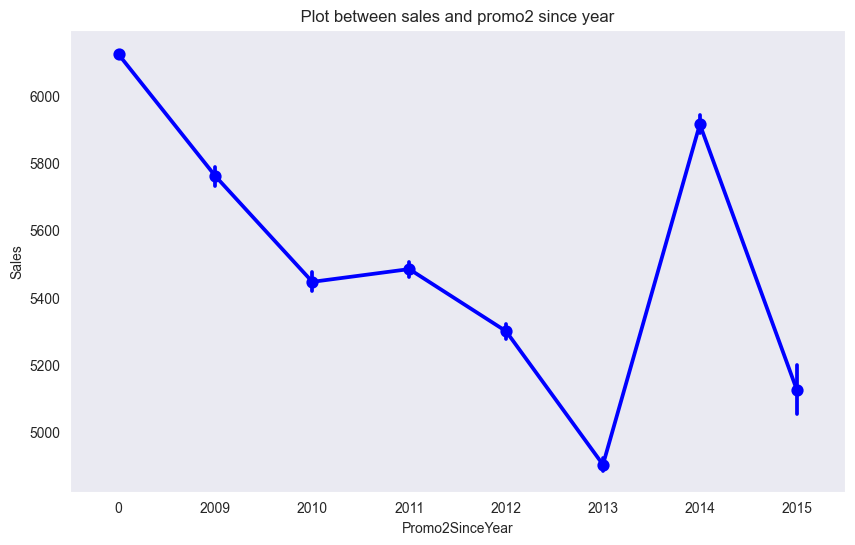

In [94]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="Promo2SinceYear", y="Sales", data=final_1 , color="blue")
sns.set_style("dark")
plt.title(" Plot between sales and promo2 since year ")


*From This Graph We saw that sales of  stores  is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.*

Text(0.5, 1.0, 'plot between sales and dayof week ')

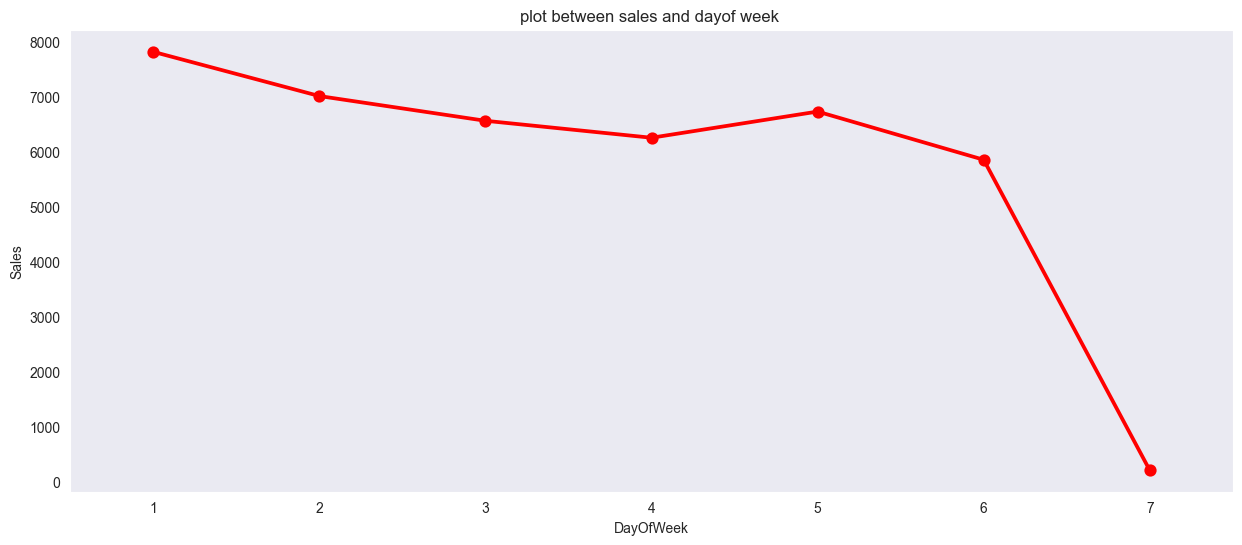

In [95]:
plt.figure(figsize=(15,6))
sns.pointplot(x="DayOfWeek", y="Sales", data=final_1 , color="red")
sns.set_style("dark")
plt.title("plot between sales and dayof week ")


*From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same  is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday ,so the Sales is closed to Zero.*


Text(0.5, 1.0, ' plot between sales and Comption open since month ')

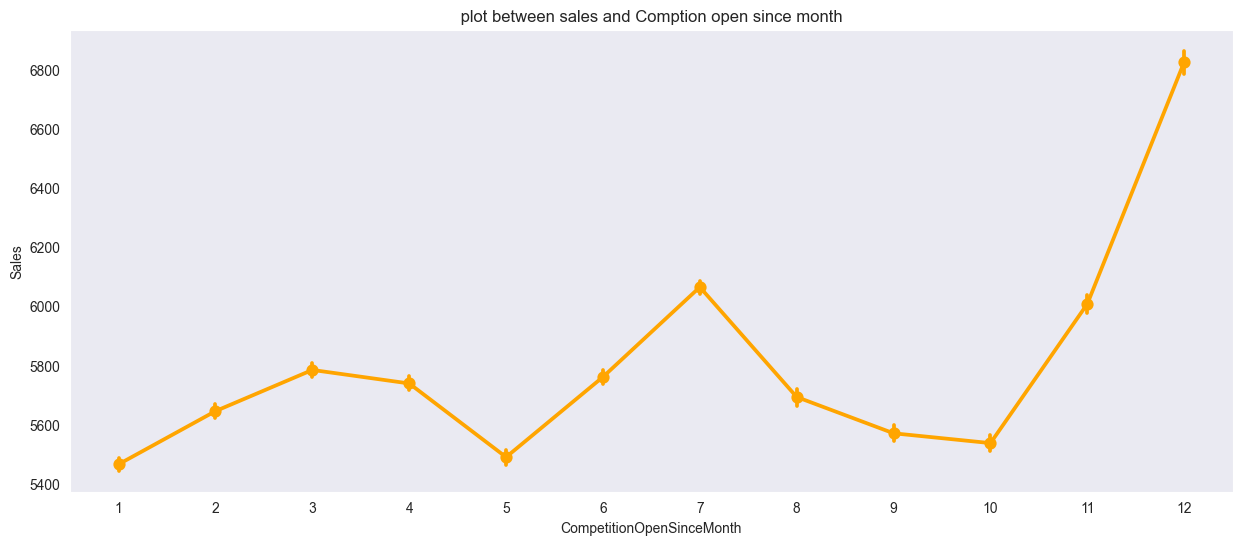

In [96]:
plt.figure(figsize=(15,6))
sns.pointplot(x='CompetitionOpenSinceMonth', y='Sales', data=final_1,color="orange") 
sns.set_style("dark")
plt.title(" plot between sales and Comption open since month ")

**BOX PLOT**


Text(0.5, 1.0, 'Boxplot For Sales Value')

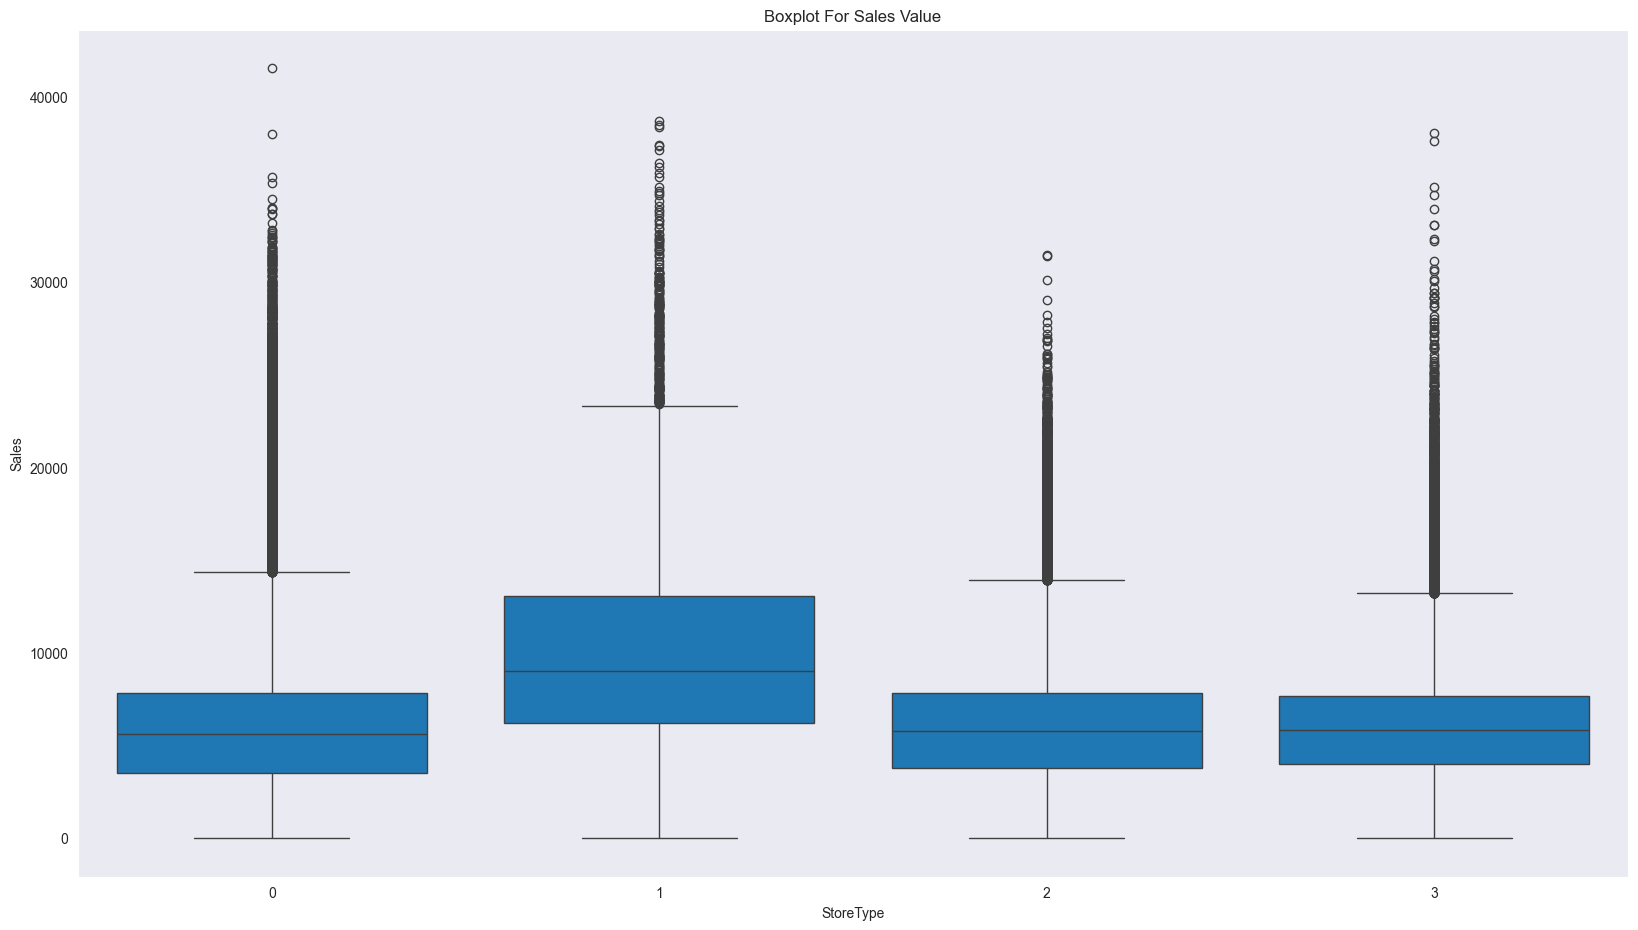

In [97]:
plt.figure(figsize=(20, 11))
sns.boxplot(x = 'StoreType' , y='Sales', data= final_1, saturation=1.5, width=0.8)
plt.title("Boxplot For Sales Value")

Text(0.5, 1.0, 'Boxplot For Sales Value on the basis of Assortatio')

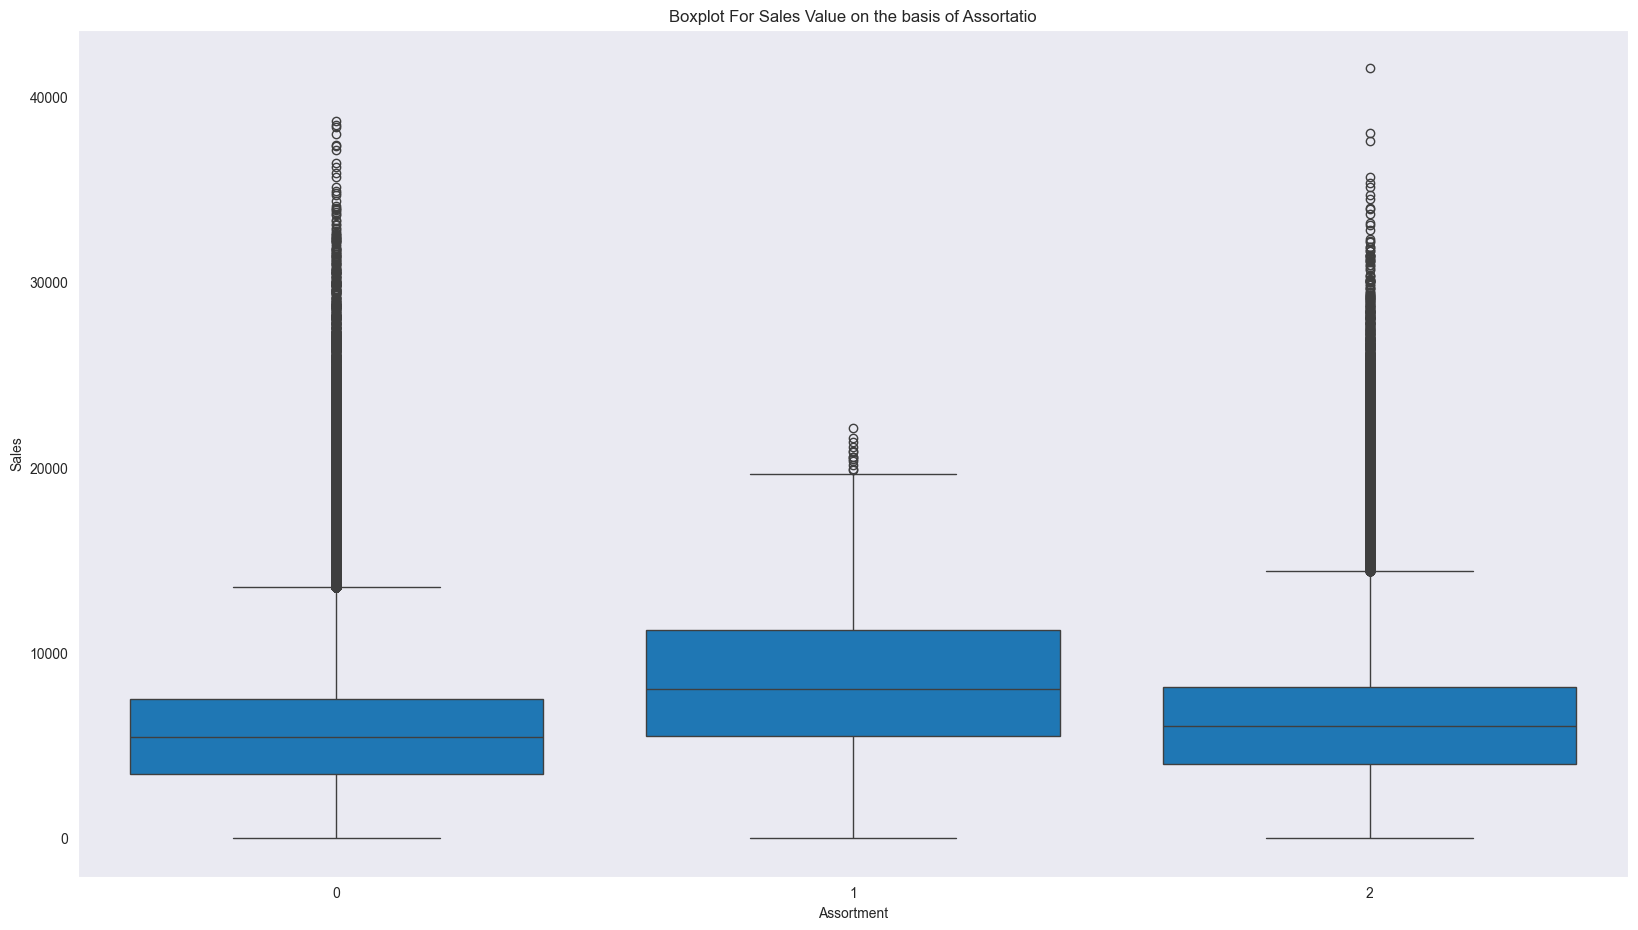

In [98]:
plt.figure(figsize=(20, 11))
sns.boxplot(x = 'Assortment' , y='Sales', data= final_1, saturation=1.5, width=0.8)
plt.title("Boxplot For Sales Value on the basis of Assortatio")

Text(0.5, 1.0, 'Store Daily Open Countplot')

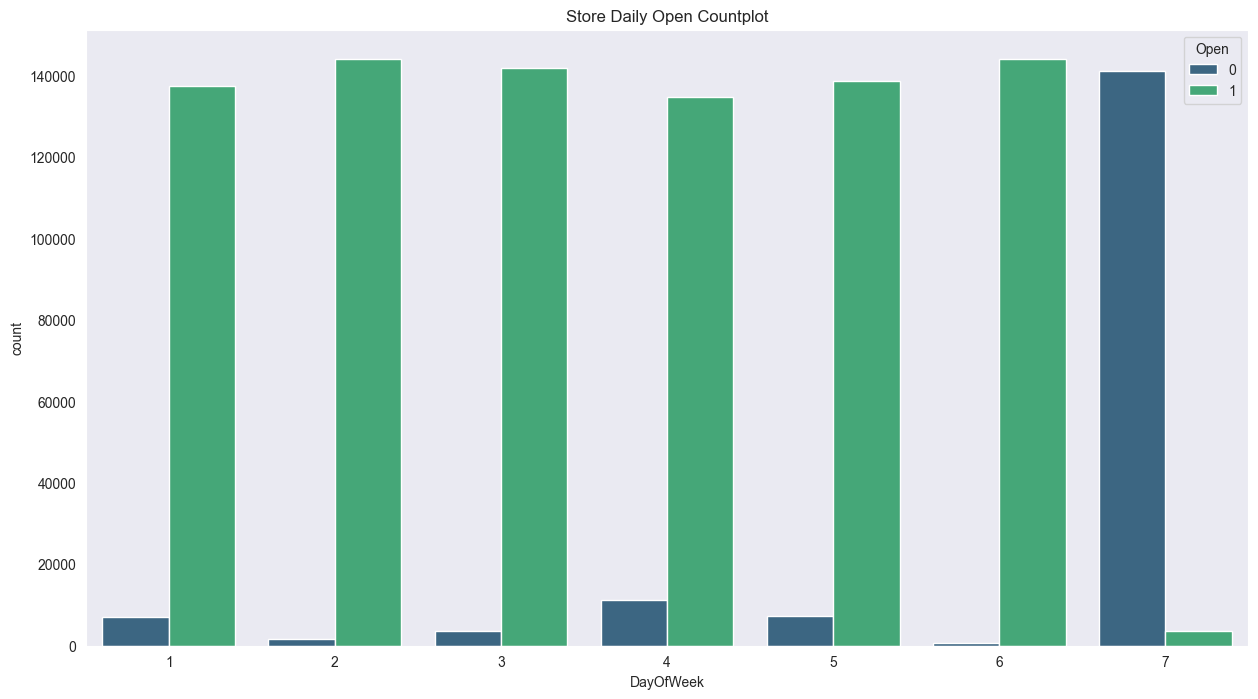

In [99]:
plt.figure(figsize=(15,8))
sns.countplot(x='DayOfWeek', hue='Open', data=final_1, palette='viridis')
plt.title('Store Daily Open Countplot')


/var/folders/rd/865zm2ss20s5_zg1t3c8f2h40000gn/T/ipykernel_48422/727777861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo", y="Sales", data= final_1, palette='viridis')


<Axes: xlabel='Promo', ylabel='Sales'>

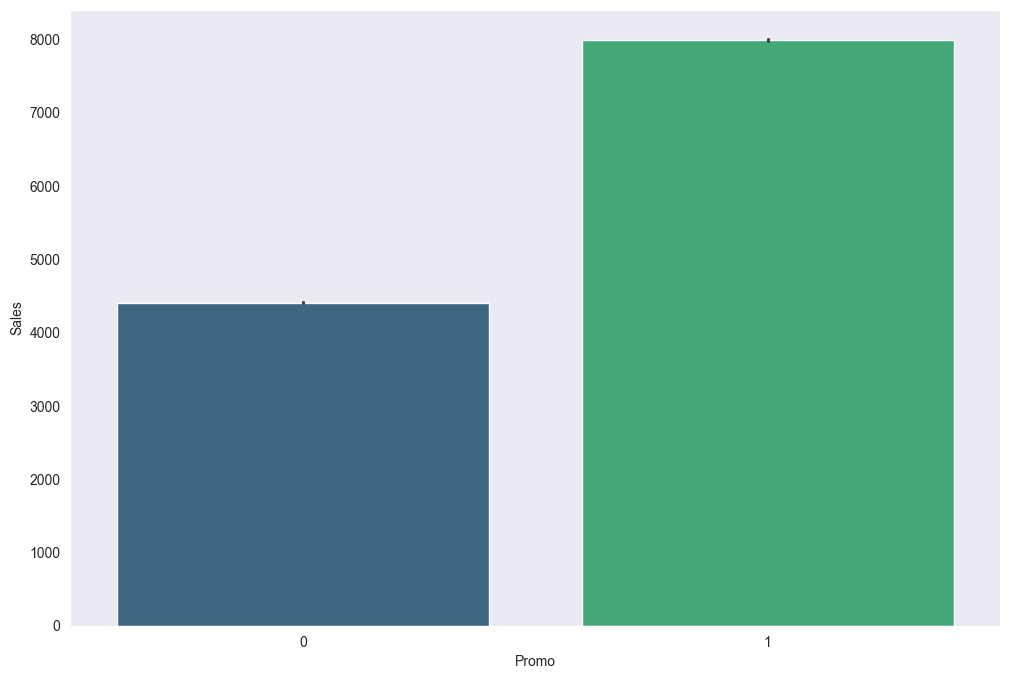

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Promo", y="Sales", data= final_1, palette='viridis')


**Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.**

## **State Holiday**

**0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None**

/var/folders/rd/865zm2ss20s5_zg1t3c8f2h40000gn/T/ipykernel_48422/1884959520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='StateHoliday', y= 'Sales',data=final_1,  palette='viridis')


<Axes: xlabel='StateHoliday', ylabel='Sales'>

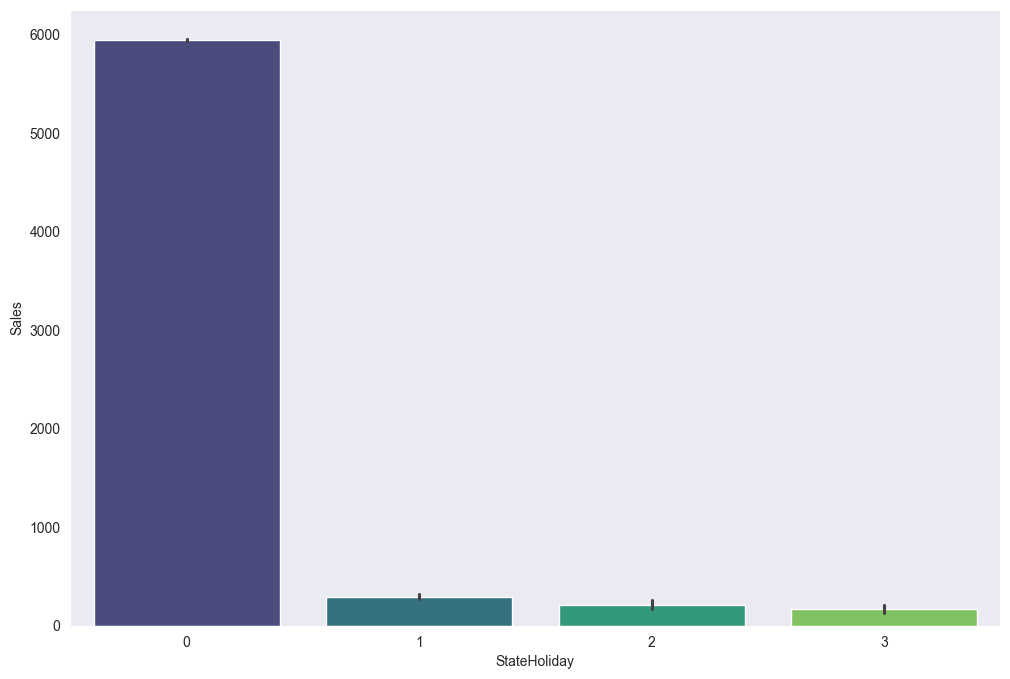

In [101]:
plt.figure(figsize=(12,8))
sns.barplot(x ='StateHoliday', y= 'Sales',data=final_1,  palette='viridis')

## **School Holiday**

**0='Not Holiday', 1='Holiday'**

/var/folders/rd/865zm2ss20s5_zg1t3c8f2h40000gn/T/ipykernel_48422/4151096529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SchoolHoliday", y="Sales", data=final_1 , palette='viridis')


<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

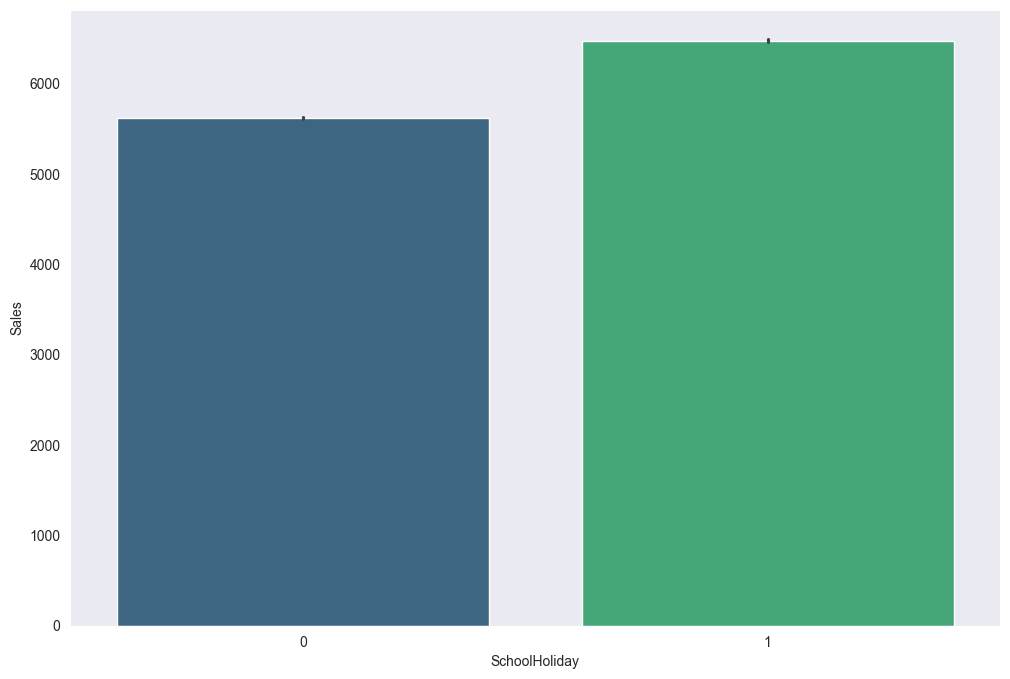

In [102]:
plt.figure(figsize=(12, 8))
sns.barplot(x="SchoolHoliday", y="Sales", data=final_1 , palette='viridis')


**We note that on state and holiday breaks, the majority of the stores stay closed. What's fascinating to notice, though, is that more stores opened during school holidays than during state holidays. Not to mention, the stores that were open throughout the school vacations had higher sales than usual.**

# **Conclusion of EDA**





1) From the competition and sales of plots ajar According to the month, sales start to rise in November and reach their peak in December.

2) Plotting sales by day of the week reveals that sales are highest on Monday, start to decline from Tuesday through Saturday, and reach nearly zero on Sunday.

3) The relationship between sales and promotion demonstrates how promotion can boost sales.

4) The type of store has a big impact on how stores open.

5) Aside from renovations or other circumstances, none of the Type "b" stores ever closed.

6) Sales at all Type "b" stores are significantly greater and are largely consistent, with weekend peaks.

7) Only Store Type "b" offers Selection Level "b."


8) We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays

# **5-Feature Engineering & Data Pre-processing**

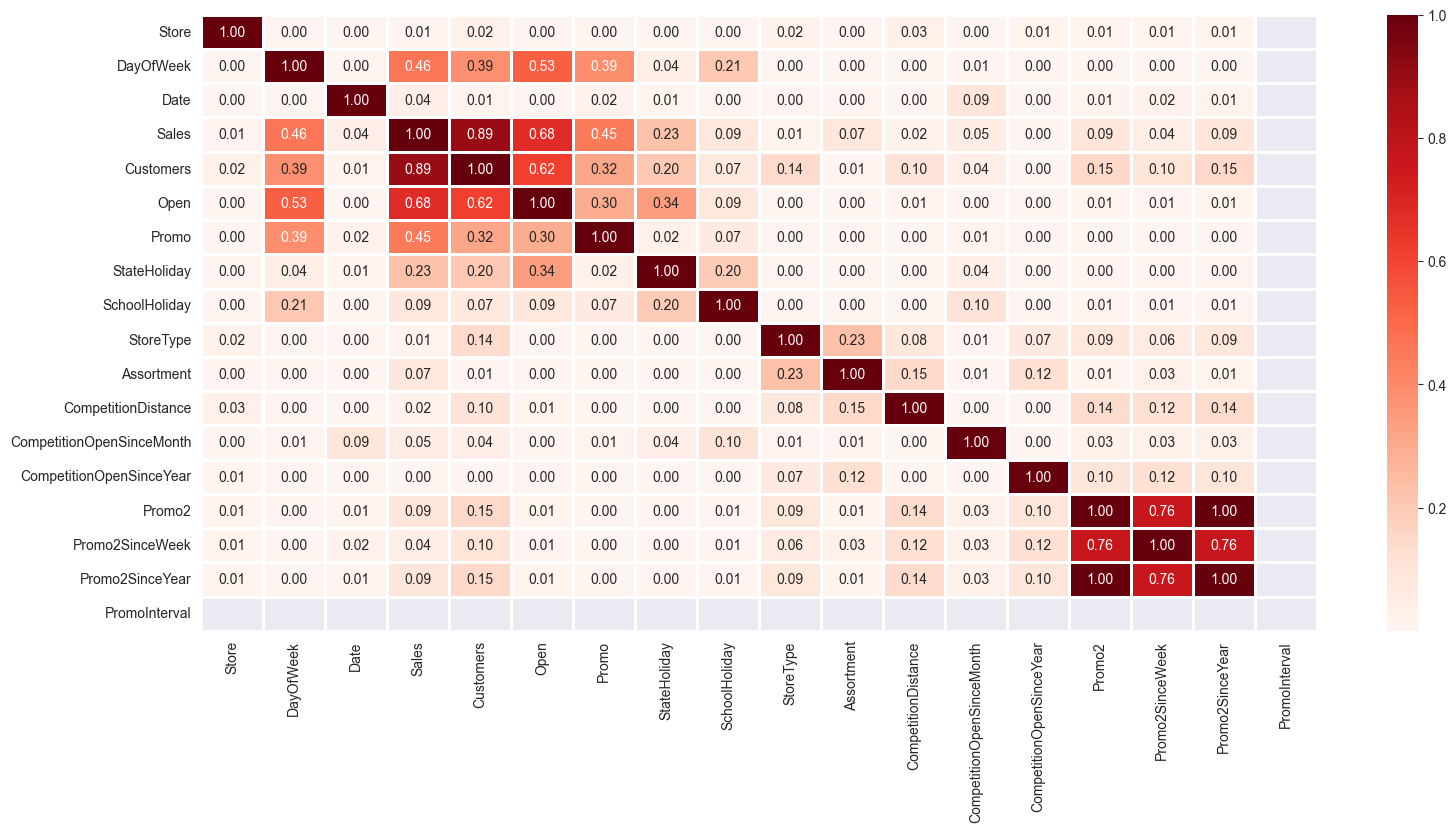

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))
#Convert non-numeric values to NaN
final_1 = final_1.apply(pd.to_numeric, errors='coerce')
correlation = final_1.corr()

sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=2, fmt=".2f")
plt.show()

# **Multicollinearity**

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Drop rows with missing values
    X_no_missing = X.dropna()

    # Extract columns for VIF calculation
    columns_for_vif = [col for col in X_no_missing.columns if col != 'Sales']
    
    # Subset the DataFrame with selected columns
    X_subset = X_no_missing[columns_for_vif]

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_subset.columns
    vif["VIF"] = [variance_inflation_factor(X_subset.values, i) for i in range(X_subset.shape[1])]

    return vif
calc_vif(final_1[[i for i in final_1.describe().columns if i not in ['Sales']]])
# Assuming 'final_1' is your DataFrame
print(calc_vif(final_1))


/Users/hariomgupta/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/hariomgupta/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                    variables        VIF
0                       Store   0.999148
1                   DayOfWeek   0.998867
2                        Date  36.465840
3                   Customers   1.017036
4                        Open   0.998875
5                       Promo   1.000285
6                StateHoliday   1.000043
7               SchoolHoliday   1.000071
8                   StoreType   1.003245
9                  Assortment   1.041134
10        CompetitionDistance   0.999805
11  CompetitionOpenSinceMonth   1.005520
12   CompetitionOpenSinceYear   0.999389
13                     Promo2        NaN
14            Promo2SinceWeek        NaN
15            Promo2SinceYear        NaN
16              PromoInterval        NaN


**In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.**

In [125]:
calc_vif(final_1[[i for i in final_1.describe().columns if i not in ['Sales','Promo2']]])

/Users/hariomgupta/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Store,0.999148
1,DayOfWeek,0.998867
2,Date,36.465840
3,Customers,1.017036
4,Open,0.998875
5,Promo,1.000285
6,StateHoliday,1.000043
7,SchoolHoliday,1.000071
8,StoreType,1.003245
9,Assortment,1.041134


### **VIF factor below 10 is look good for Machine Learning Model.**

# **Analysis of Target Variable i.e 'Sales'.**

<Axes: >

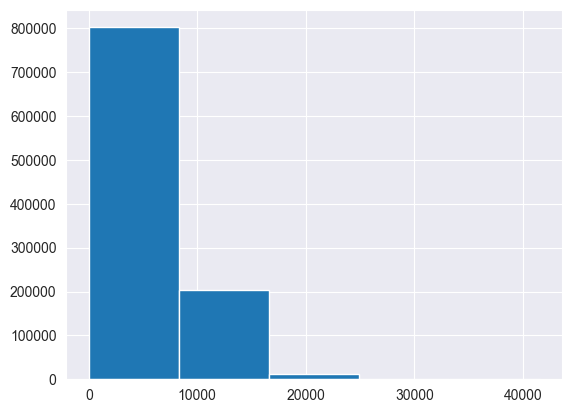

In [127]:
pd.Series(final_1['Sales']).hist(bins=5,)

In [128]:
final_1[(final_1.Open == 0) & (final_1.Sales==0)].count()[0] 

172817


**So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.**

In [132]:
new_df=final_1.drop(final_1[(final_1.Open == 0) & (final_1.Sales == 0)].index)

In [164]:
new_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0.0,Date_f
0,1,5,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,True,2015-07-31
1,2,5,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,False,2015-07-31
2,3,5,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,False,2015-07-31
3,4,5,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,True,2015-07-31
4,5,5,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,True,2015-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,True,2013-01-01
1016827,733,2,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,True,2013-01-01
1016863,769,2,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,False,2013-01-01
1017042,948,2,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,True,2013-01-01


In [165]:
# Check if 'PromoInterval' is in the columns of new_df
if 'PromoInterval' in new_df.columns:
    # If it exists, create dummy variables
    new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

# Display the modified DataFrame
print(new_df)


         Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0            1          5   5263        555     1      1             0   
1            2          5   6064        625     1      1             0   
2            3          5   8314        821     1      1             0   
3            4          5  13995       1498     1      1             0   
4            5          5   4822        559     1      1             0   
...        ...        ...    ...        ...   ...    ...           ...   
1016776    682          2   3375        566     1      0             1   
1016827    733          2  10765       2377     1      0             1   
1016863    769          2   5035       1248     1      0             1   
1017042    948          2   4491       1039     1      0             1   
1017190   1097          2   5961       1405     1      0             1   

         SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0                    1          2        

## Export data in csv form after cleaning


In [166]:
new_df.to_csv('cleandata.csv', index=False)

**Hypothetical Statement - 1**

### **MODEL 1 (excluding rows which has sales =0)**